# EDA
Load only the data about July

In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [30]:
data_categories = {
    "회원정보": {"folder": "1.회원정보", "suffix": "회원정보", "var_prefix": "customer"},
    "신용정보": {"folder": "2.신용정보", "suffix": "신용정보", "var_prefix": "credit"},
    "승인매출정보": {"folder": "3.승인매출정보", "suffix": "승인매출정보", "var_prefix": "sales"},
    "청구정보": {"folder": "4.청구입금정보", "suffix": "청구정보", "var_prefix": "billing"},
    "잔액정보": {"folder": "5.잔액정보", "suffix": "잔액정보", "var_prefix": "balance"},
    "채널정보": {"folder": "6.채널정보", "suffix": "채널정보", "var_prefix": "channel"},
    "마케팅정보": {"folder": "7.마케팅정보", "suffix": "마케팅정보", "var_prefix": "marketing"},
    "성과정보": {"folder": "8.성과정보", "suffix": "성과정보", "var_prefix": "performance"}
}

dfs = []
for category, info in data_categories.items():
    folder = info["folder"]
    suffix = info["suffix"]
    var_prefix = info["var_prefix"]

    month = '07'
    file_path = f'./train/{folder}/2018{month}_train_{suffix}.parquet'

    dfs.append(pd.read_parquet(file_path))
    print(f'{category} loaded')
    print(dfs[-1].shape)


df = reduce(lambda left, right: pd.DataFrame.merge(left, right, on=['기준년월', 'ID'], how='left'), dfs)
print(df.shape)


회원정보 loaded
(400000, 78)
신용정보 loaded
(400000, 42)
승인매출정보 loaded
(400000, 406)
청구정보 loaded
(400000, 46)
잔액정보 loaded
(400000, 82)
채널정보 loaded
(400000, 105)
마케팅정보 loaded
(400000, 64)
성과정보 loaded
(400000, 49)
(400000, 858)


In [31]:
df.head().to_csv('train_data_sample.csv', encoding='utf-8')

In [32]:
print(df.info())
print('----타입이 Object인 컬럼----')
print(df.select_dtypes(include=['object']).columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Columns: 858 entries, 기준년월 to 혜택수혜율_B0M
dtypes: float64(61), int64(747), object(50)
memory usage: 2.6+ GB
None
----타입이 Object인 컬럼----
Index(['ID', '연령', 'Segment', '가입통신회사코드', '거주시도명', '직장시도명', '_1순위신용체크구분',
       '_2순위신용체크구분', '연회비발생카드수_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M',
       '우수회원면제카드수_B0M', '기타면제카드수_B0M', 'Life_Stage', '자발한도감액횟수_R12M',
       '한도증액횟수_R12M', '카드론동의여부', 'RV전환가능여부', '한도심사요청건수', '_1순위업종', '_2순위업종',
       '_3순위업종', '_1순위쇼핑업종', '_2순위쇼핑업종', '_3순위쇼핑업종', '_1순위교통업종', '_2순위교통업종',
       '_3순위교통업종', '_1순위여유업종', '_2순위여유업종', '_3순위여유업종', '_1순위납부업종', '_2순위납부업종',
       '_3순위납부업종', '최종카드론_신청경로코드', '이용금액대', '대표결제방법코드', '대표청구지고객주소구분코드',
       '대표청구서수령지구분코드', '청구서수령방법', '할인건수_R3M', '할인건수_B0M', '인입횟수_ARS_R6M',
       '이용메뉴건수_ARS_R6M', '방문횟수_PC_R6M', '방문일수_PC_R6M', '방문횟수_앱_R6M', 'OS구분코드',
       '캠페인접촉건수_R12M', '캠페인접촉일수_R12M'],
      dtype='object')


In [33]:
num_null = df.isnull().sum()
num_null = num_null[num_null > 0]
num_null = num_null.sort_values(ascending=False)
print(num_null.info())
num_null


<class 'pandas.core.series.Series'>
Index: 30 entries, 연체일자_B0M to _1순위신용체크구분
Series name: None
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 480.0+ bytes
None


연체일자_B0M          398300
_3순위여유업종          390745
_3순위납부업종          384482
_2순위여유업종          366992
_2순위납부업종          336229
_3순위교통업종          335842
최종카드론_대출일자        331390
최종카드론_신청경로코드      326645
최종카드론_금융상환방식코드    326582
RV신청일자            325079
_1순위여유업종          297862
OS구분코드            272261
_2순위교통업종          269582
_3순위쇼핑업종          215290
_1순위납부업종          196673
_1순위교통업종          186099
_2순위쇼핑업종          184045
_3순위업종            175156
_2순위신용체크구분        157866
_1순위쇼핑업종          143665
_2순위업종            141819
혜택수혜율_B0M          90699
_1순위업종             79580
최종유효년월_신용_이용       79318
혜택수혜율_R3M          70485
가입통신회사코드           67364
직장시도명              40807
최종유효년월_신용_이용가능     32828
최종카드발급일자            3007
_1순위신용체크구분          2147
dtype: int64

In [34]:
dup_rows = df.drop('ID', axis=1).duplicated()
print(dup_rows.value_counts())


False    400000
Name: count, dtype: int64


In [35]:
df.describe()

,기준년월,남녀구분코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
count,400000.0,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,4.000000e+05,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,329515.000000,309301.000000
mean,201807.0,1.476955,0.957050,0.887640,0.612520,0.992502,1.252465,1.157877,2.012258e+07,71.269397,...,0.952175,0.940462,0.943193,0.948264,0.945148,0.025180,0.062356,-0.012169,4.522066,5.274741
std,0.0,0.499469,0.202745,0.315809,0.487175,0.086263,0.547569,0.612808,6.046411e+04,72.395152,...,0.233355,0.468485,0.316631,0.221914,0.273148,0.478164,0.563337,0.155578,17.423376,19.325688
min,201807.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.990110e+07,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.999996,-1.999996,-1.999996,-1.993326,-1.832605
25%,201807.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.010030e+07,14.000000,...,0.999998,0.903195,0.999998,0.999998,0.999998,-0.108759,-0.068548,0.000000,0.000000,0.000000
50%,201807.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.014070e+07,49.000000,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,0.739790,0.844587
75%,201807.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.017060e+07,101.000000,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.114131,0.158284,0.000000,2.172902,2.447796
max,201807.0,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.018060e+07,333.000000,...,1.508872,1.996376,1.994726,1.988199,1.998830,1.999996,1.999996,1.999996,99.999800,99.999800


In [36]:
# SEGMENT 분포
df['Segment'].value_counts()


Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64

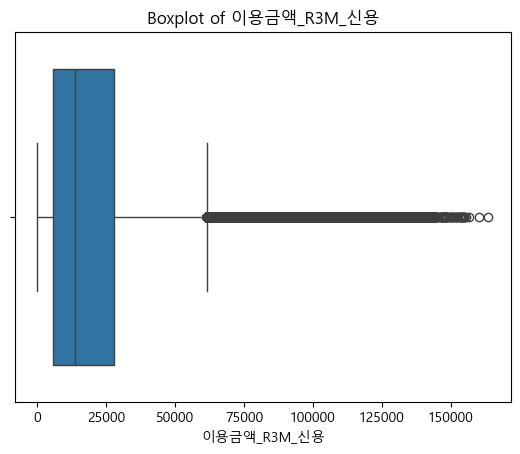

(298518,)


In [37]:
# 신용 이용금액 변수의 박스플롯
# df.shape
amount = df[df['이용금액_R3M_신용'] > 0]['이용금액_R3M_신용']

sns.boxplot(x=amount)
plt.title('Boxplot of 이용금액_R3M_신용')
plt.show()
print(amount.shape)

In [38]:
# SEGMENT 분포
df['Segment'].value_counts()


Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64

# PCA

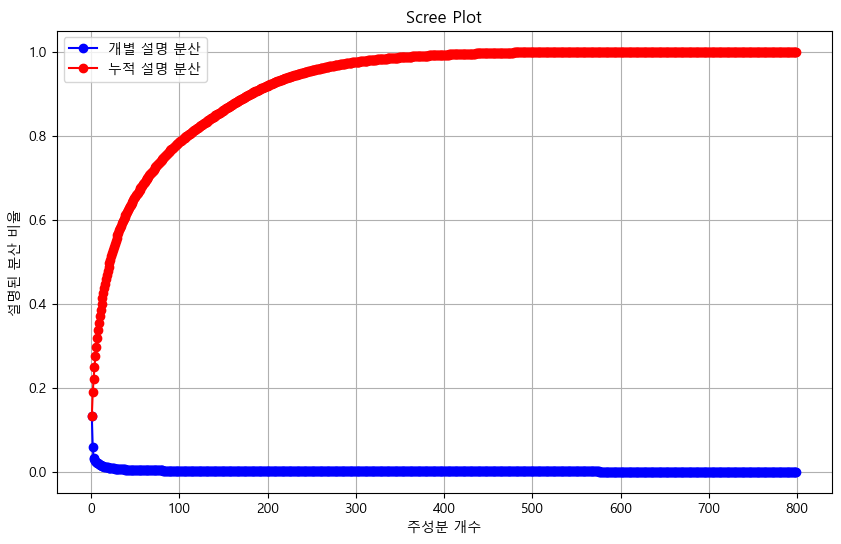

처음 10개 주성분의 설명된 분산 비율:
PC1: 0.1310
PC2: 0.0575
PC3: 0.0323
PC4: 0.0290
PC5: 0.0242
PC6: 0.0232
PC7: 0.0205
PC8: 0.0193
PC9: 0.0175
PC10: 0.0164

누적 설명된 분산 비율:
PC1까지: 0.1310
PC2까지: 0.1885
PC3까지: 0.2208
PC4까지: 0.2498
PC5까지: 0.2740
PC6까지: 0.2972
PC7까지: 0.3177
PC8까지: 0.3369
PC9까지: 0.3544
PC10까지: 0.3708


In [39]:
# PCA를 위한 데이터 전처리
# 결측치가 있는 컬럼 제거
df_pca = df.dropna(axis=1)

# ID와 Segment 컬럼 제외
df_pca = df_pca.drop(['ID', 'Segment'], axis=1)

# 수치형 데이터만 선택
numeric_cols = df_pca.select_dtypes(include=['int64', 'float64']).columns
df_pca = df_pca[numeric_cols]

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# 설명된 분산 비율 계산
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Scree Plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.xlabel('주성분 개수')
plt.ylabel('설명된 분산 비율')
plt.title('Scree Plot')
plt.legend(['개별 설명 분산', '누적 설명 분산'])
plt.grid(True)
plt.show()

# 설명된 분산 비율 출력
print("처음 10개 주성분의 설명된 분산 비율:")
for i, ratio in enumerate(explained_variance_ratio[:10], 1):
    print(f"PC{i}: {ratio:.4f}")

print("\n누적 설명된 분산 비율:")
for i, ratio in enumerate(cumulative_variance_ratio[:10], 1):
    print(f"PC{i}까지: {ratio:.4f}")


In [44]:
# 300개의 주성분으로 PCA 수행
pca_300 = PCA(n_components=300)
pca_result_300 = pca_300.fit_transform(df_scaled)

# 300개 주성분의 설명된 분산 비율 계산
explained_variance_ratio_300 = pca_300.explained_variance_ratio_
cumulative_variance_ratio_300 = np.cumsum(explained_variance_ratio_300)

print(f"\n300개 주성분의 누적 설명된 분산 비율: {cumulative_variance_ratio_300[-1]:.4f}")

# PCA 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(
    pca_result_300,
    columns=[f'PC{i+1}' for i in range(300)]
)

print("\nPCA 결과 데이터 형태:", pca_df.shape)



300개 주성분의 누적 설명된 분산 비율: 0.9751

PCA 결과 데이터 형태: (400000, 300)


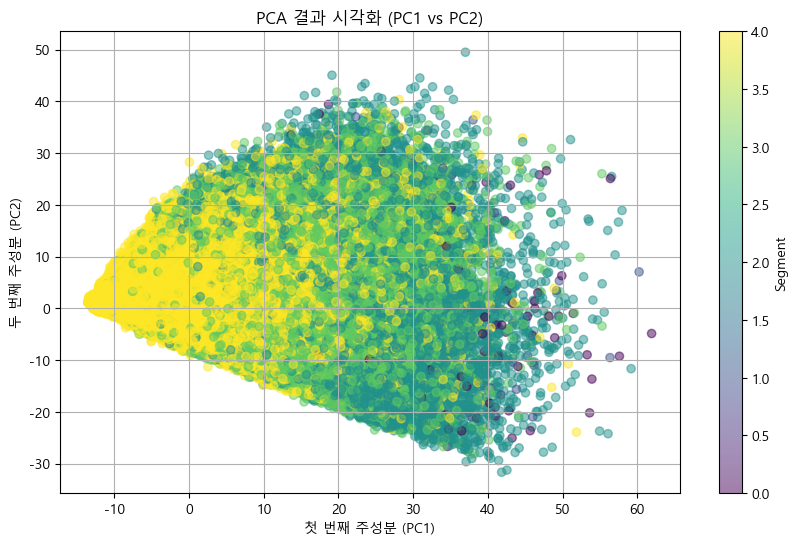

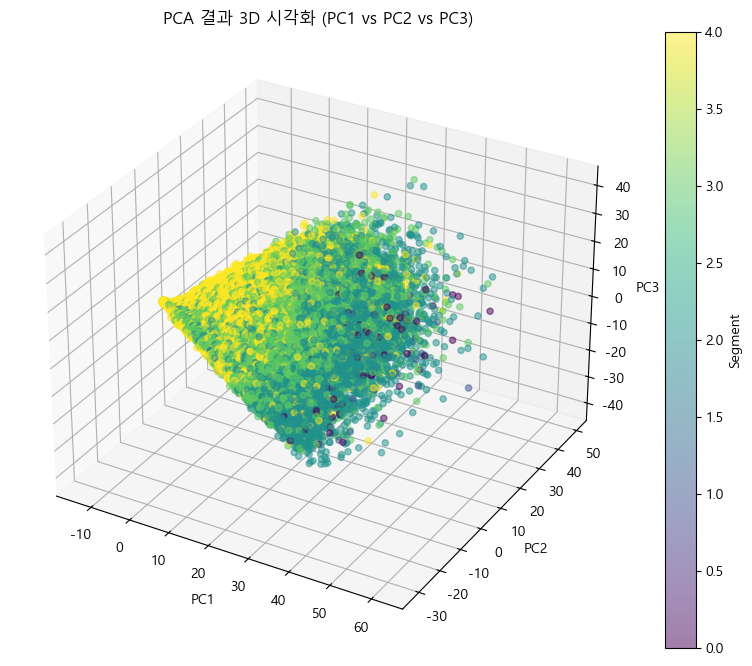

In [41]:
# PCA 결과 시각화
plt.figure(figsize=(10, 6))
# Segment를 숫자로 매핑
segment_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
segment_numeric = df['Segment'].map(segment_map)

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=segment_numeric, alpha=0.5, cmap='viridis')
plt.xlabel('첫 번째 주성분 (PC1)')
plt.ylabel('두 번째 주성분 (PC2)')
plt.title('PCA 결과 시각화 (PC1 vs PC2)')
plt.colorbar(label='Segment')
plt.grid(True)
plt.show()

# 처음 3개 주성분으로 3D 시각화
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], 
                    pca_df['PC2'],
                    pca_df['PC3'],
                    c=segment_numeric,
                    alpha=0.5,
                    cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, label='Segment')
plt.title('PCA 결과 3D 시각화 (PC1 vs PC2 vs PC3)')
plt.show()


## KMeans

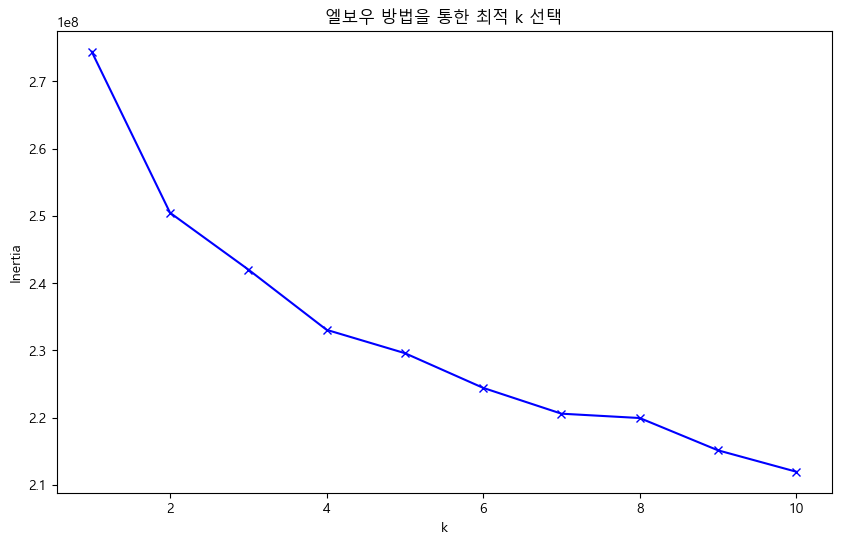


클러스터별 데이터 분포:
Cluster
2    207703
1     91379
3     53135
0     41874
4      5909
Name: count, dtype: int64

클러스터와 Segment 교차 분석:
Segment    A   B      C      D       E
Cluster                               
0         49  10   5897  12882   23036
1          0   0    566   2398   88415
2          1   0   3582  19201  184919
3        109  14  10602  21814   20596
4          3   0    618   1912    3376


In [42]:
from sklearn.cluster import KMeans

# data preprocessing
# 결측치가 있는 컬럼 제거
df_kmeans = df.dropna(axis=1)

# ID와 Segment 컬럼 제외
df_kmeans = df_kmeans.drop(['ID', 'Segment'], axis=1)

# 수치형 데이터만 선택
numeric_cols = df_kmeans.select_dtypes(include=['int64', 'float64']).columns
df_kmeans = df_kmeans[numeric_cols]

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kmeans)

# 최적의 클러스터 수 찾기 (엘보우 방법)
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# 엘보우 곡선 그리기
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('엘보우 방법을 통한 최적 k 선택')
plt.show()

# 최적의 k로 클러스터링 수행
optimal_k = 5  # 엘보우 곡선에서 결정
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# 클러스터 결과 분석
cluster_df = pd.DataFrame({'Cluster': clusters, 'Segment': df['Segment']})

print("\n클러스터별 데이터 분포:")
print(cluster_df['Cluster'].value_counts())

print("\n클러스터와 Segment 교차 분석:")
print(pd.crosstab(cluster_df['Cluster'], cluster_df['Segment']))



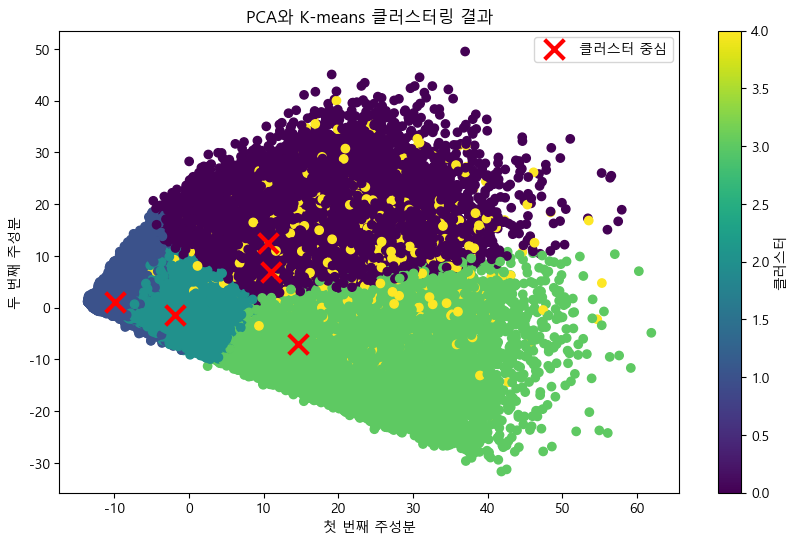


PCA 설명된 분산 비율:
[0.13103569 0.05749511]


In [43]:
# PCA를 사용하여 2차원으로 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='클러스터')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.title('PCA와 K-means 클러스터링 결과')

# 클러스터 중심점 표시
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='클러스터 중심')
plt.legend()
plt.show()

# 설명된 분산 비율 출력
print('\nPCA 설명된 분산 비율:')
print(pca.explained_variance_ratio_)
